# Foldlabel images analyses

This notebook aims to make sure that foldlabel images are correct.

In [1]:
import os
from soma import aims
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import re

In [2]:
src_dir = '/neurospin/dico/data/deep_folding/datasets/hcp/foldlabel/R/'

### Is 1000 enough to cover all simple surfaces for the whole brain ?

In [3]:
nb_ss = {}

for sub in tqdm(os.listdir(src_dir)):
    if 'minf' not in sub:
        foldlabel = aims.read(os.path.join(src_dir, sub))
        val = np.unique(foldlabel)
        max_ss = max(val[val<1000])
        if max_ss in nb_ss:
            nb_ss[max_ss]+=1
        else:
            nb_ss[max_ss]=1

100%|██████████| 2202/2202 [06:39<00:00,  5.51it/s]


(array([18., 30., 31., 31., 31., 30., 26., 11.,  4.,  4.]),
 array([248. , 279.1, 310.2, 341.3, 372.4, 403.5, 434.6, 465.7, 496.8,
        527.9, 559. ]),
 <BarContainer object of 10 artists>)

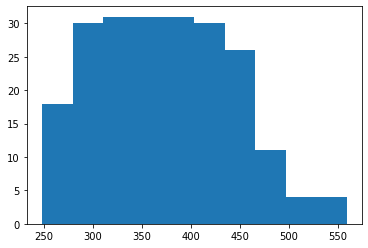

In [4]:
plt.hist(nb_ss)

There are always fewer than 1000 simple surfaces for the whole brain in HCP dataset.

The maximum number of simple surfaces is 559.

### Is the resampling acting correctly when dealing with foldlabel images ?

Comparison of number of simple surfaces for the whole brains at 0.7mm and 2mm.

 50%|█████     | 3/6 [00:00<00:00,  9.75it/s]

54
[4096, 2053, 3982, 152, 2329, 4511, 288, 290, 293, 3242, 300, 1070, 305, 307, 4280, 3129, 1210, 315, 316, 317, 319, 2112, 321, 325, 3398, 327, 200, 2248, 2249, 331, 332, 2252, 3015, 212, 2260, 2007, 2264, 218, 3164, 3805, 2014, 3039, 4444, 2274, 2275, 2021, 4585, 2028, 2156, 2285, 3437, 4332, 4212, 2043]


 67%|██████▋   | 4/6 [00:00<00:00,  5.91it/s]

78
[1025, 2179, 1285, 4244, 1048, 1179, 1180, 2079, 3231, 2081, 290, 2339, 3235, 1064, 3369, 170, 299, 1324, 301, 3373, 304, 4401, 2100, 2230, 1335, 312, 2233, 2106, 2234, 318, 4158, 3904, 321, 322, 2113, 3010, 1217, 326, 2247, 3399, 329, 330, 2123, 332, 4420, 334, 335, 336, 337, 4041, 339, 3284, 2134, 4567, 3418, 2011, 2012, 2013, 2273, 2146, 3298, 4580, 4196, 1124, 2151, 2274, 4065, 3434, 2023, 2026, 2033, 4594, 4467, 4210, 1271, 2296, 3705, 2046]


100%|██████████| 6/6 [00:00<00:00,  6.45it/s]

78
[3969, 2308, 3811, 1288, 2056, 138, 1290, 13, 1040, 4370, 2323, 2324, 4118, 279, 3482, 2083, 4774, 2087, 2088, 2095, 4144, 4533, 4151, 1211, 2107, 2235, 4720, 2246, 4167, 330, 331, 1355, 2252, 206, 2254, 3275, 2257, 3786, 4469, 343, 1239, 345, 346, 347, 3032, 1373, 350, 2015, 2142, 4088, 355, 3171, 357, 358, 359, 3304, 361, 3050, 3429, 364, 3692, 2030, 367, 368, 4335, 1266, 371, 2162, 373, 374, 3190, 2040, 377, 2042, 379, 3814, 3453, 382]


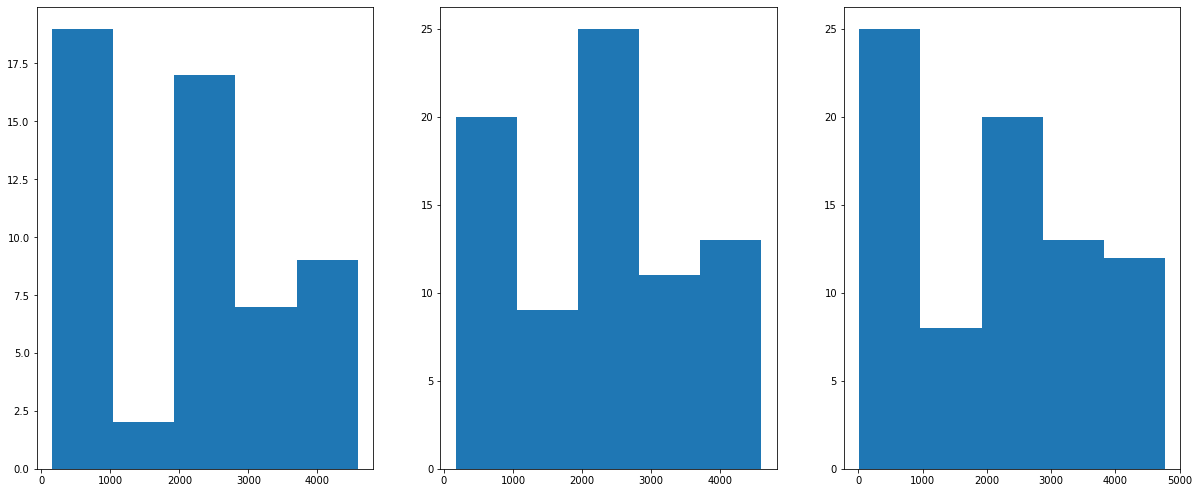

In [5]:
res_dir = '/neurospin/dico/data/deep_folding/analysis_foldlabel/Rlabels/'

additional_dir = 'Rfoldlabel_'
fig, axs = plt.subplots(1,3)
i = 0

fig.set_size_inches(20.5, 8.5, forward=True)

for sub in tqdm(os.listdir(res_dir)):
    nb_val_2mm = {}
    nb_val_07mm = {}
    if 'minf' not in sub:
        id_sub = re.search('([ae\d]{5,6})', sub).group(1)
        foldlabel_2mm = aims.read(os.path.join(res_dir, sub))
        foldlabel_07mm = aims.read(os.path.join(src_dir, additional_dir + id_sub + '.nii.gz'))
        
        val_2mm = np.unique(foldlabel_2mm)
        val_07mm = np.unique(foldlabel_07mm)
        print(len(list(set(val_07mm)-set(val_2mm))))
        print(list(set(val_07mm)-set(val_2mm)))
        axs[i].hist(list(set(val_07mm)-set(val_2mm)), bins=5)
        i+=1

 50%|█████     | 3/6 [00:00<00:00, 11.38it/s]

0.9601196101448153
0


 83%|████████▎ | 5/6 [00:00<00:00,  8.85it/s]

1.0129759284290571
0


100%|██████████| 6/6 [00:00<00:00,  7.23it/s]

1.0129227188978547
0


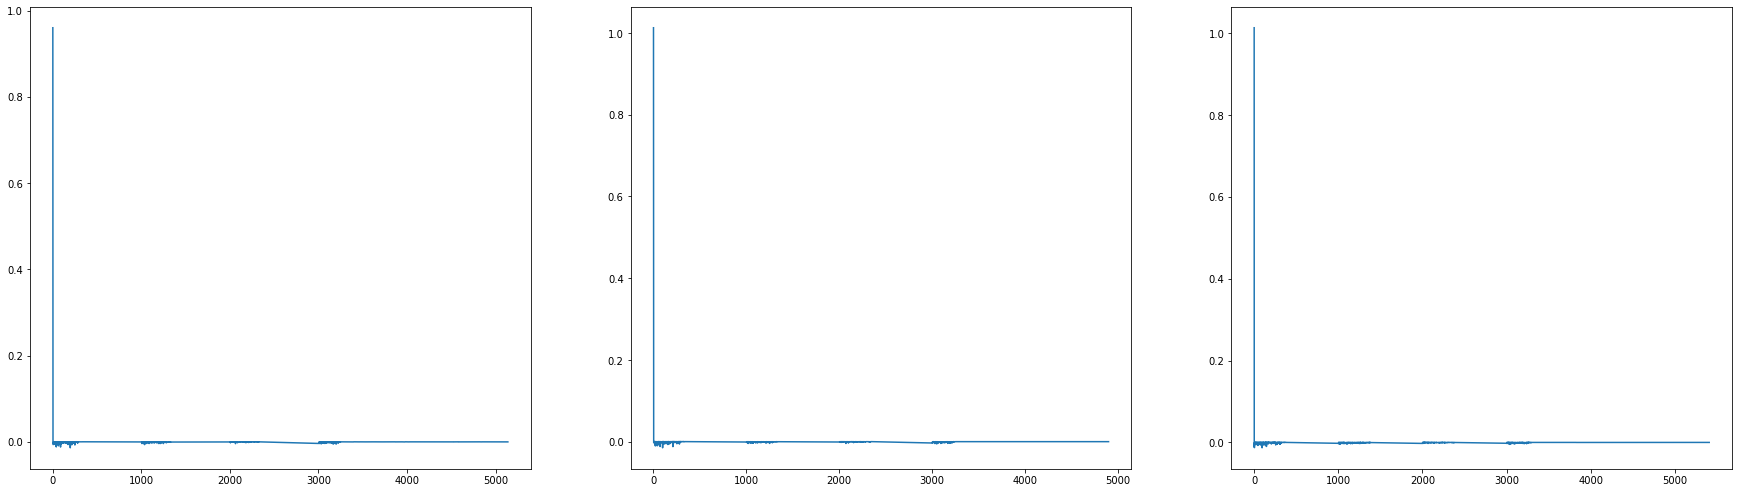

In [6]:
res_dir = '/neurospin/dico/data/deep_folding/analysis_foldlabel/Rlabels/'

additional_dir = 'Rfoldlabel_'

fig, axs = plt.subplots(1,3)
i = 0

fig.set_size_inches(30.5, 8.5, forward=True)

for sub in tqdm(os.listdir(res_dir)):
    nb_val_2mm = {}
    nb_val_07mm = {}
    delta_prop_glob = {}
    if 'minf' not in sub:
        id_sub = re.search('([ae\d]{5,6})', sub).group(1)
        foldlabel_2mm = aims.read(os.path.join(res_dir, sub))
        foldlabel_07mm = aims.read(os.path.join(src_dir, additional_dir + id_sub + '.nii.gz'))
        
        val_2mm = np.unique(foldlabel_2mm, return_counts=True)
        val_07mm = np.unique(foldlabel_07mm, return_counts=True)
        
        total_2mm = sum(val_2mm[1])
        total_07mm = sum(val_07mm[1])
        
        dico_glob_2mm = {key: value for key, value in zip(val_2mm[0], val_2mm[1])}
        dico_glob_07mm = {key: value for key, value in zip(val_07mm[0], val_07mm[1])}
    
        delta_prop_glob = {}
        for val, nb in dico_glob_07mm.items():
            if val in dico_glob_2mm:
                delta_prop_glob[val] = (nb/total_07mm*100) - (dico_glob_2mm[val]/total_2mm*100)
            else:
                delta_prop_glob[val] = 0
        print(delta_prop_glob[0])
        print(max(delta_prop_glob, key=delta_prop_glob.get))
        axs[i].plot(list(delta_prop_glob.keys()),list(delta_prop_glob.values()))
        i+=1

 50%|█████     | 3/6 [00:00<00:00, 10.88it/s]

13


 83%|████████▎ | 5/6 [00:00<00:00,  9.06it/s]

228


100%|██████████| 6/6 [00:00<00:00,  7.29it/s]

74


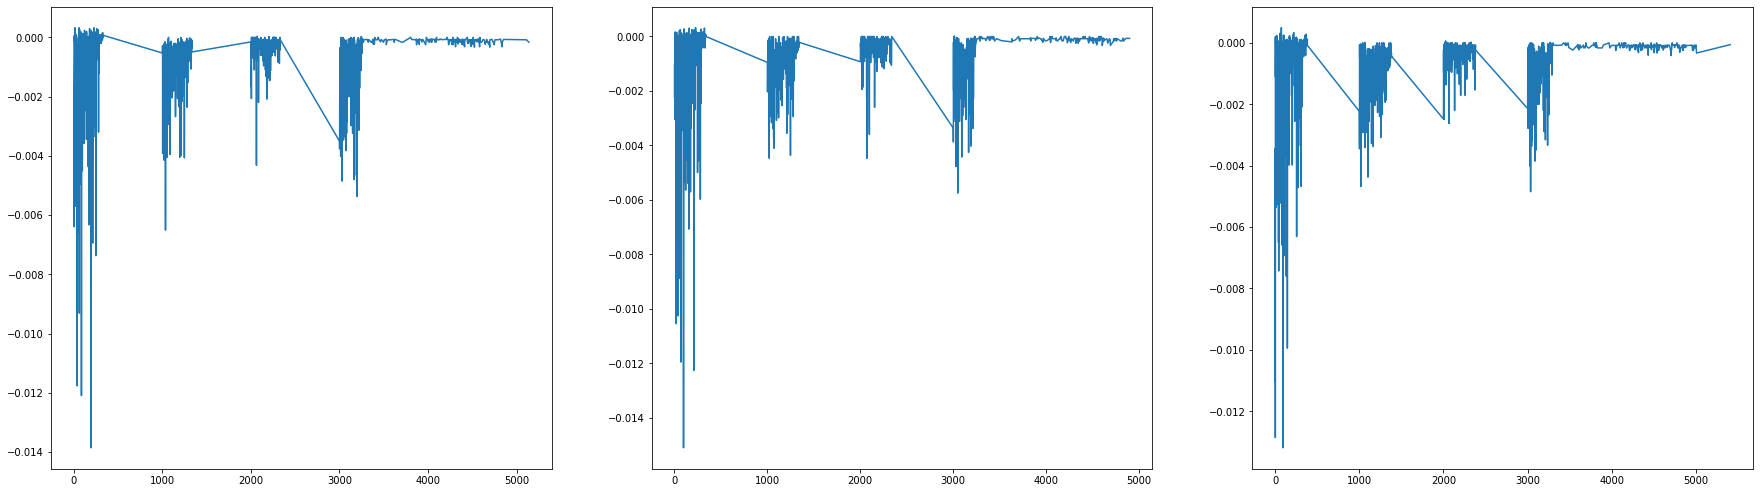

In [7]:
res_dir = '/neurospin/dico/data/deep_folding/analysis_foldlabel/Rlabels/'

additional_dir = 'Rfoldlabel_'

fig, axs = plt.subplots(1,3)
i = 0

fig.set_size_inches(30.5, 8.5, forward=True)

for sub in tqdm(os.listdir(res_dir)):
    nb_val_2mm = {}
    nb_val_07mm = {}
    delta_prop_glob = {}
    if 'minf' not in sub:
        id_sub = re.search('([ae\d]{5,6})', sub).group(1)
        foldlabel_2mm = aims.read(os.path.join(res_dir, sub))
        foldlabel_07mm = aims.read(os.path.join(src_dir, additional_dir + id_sub + '.nii.gz'))
        
        val_2mm = np.unique(foldlabel_2mm, return_counts=True)
        val_07mm = np.unique(foldlabel_07mm, return_counts=True)
        
        total_2mm = sum(val_2mm[1])
        total_07mm = sum(val_07mm[1])
        
        dico_glob_2mm = {key: value for key, value in zip(val_2mm[0], val_2mm[1])}
        dico_glob_07mm = {key: value for key, value in zip(val_07mm[0], val_07mm[1])}
    
        delta_prop_glob = {}
        for val, nb in dico_glob_07mm.items():
            if val != 0:
                if val in dico_glob_2mm:
                    delta_prop_glob[val] = (nb/total_07mm*100) - (dico_glob_2mm[val]/total_2mm*100)
                else:
                    delta_prop_glob[val] = 0
        print(max(delta_prop_glob, key=delta_prop_glob.get))
        axs[i].plot(list(delta_prop_glob.keys()),list(delta_prop_glob.values()))
        i+=1

### Analyses of SC right 2mm crops

In [8]:
src_dir = '/neurospin/dico/data/deep_folding/current/crops/SC/mask/sulcus_based/2mm/Rlabels/'

dico_label_sub = {}

for sub in tqdm(os.listdir(src_dir)):
    sub_id = re.search('([ae\d]{5,6})', sub).group(1)
    #print(sub_id)
    if 'minf' not in sub :
        foldlabel = aims.read(src_dir + sub)
        unique = np.unique(foldlabel, return_counts=True)
        dico_label = {key: value for key, value in zip(unique[0], unique[1])}
        dico_label_sub[sub_id] = dico_label

100%|██████████| 2202/2202 [00:22<00:00, 97.32it/s] 


How many folds in the crops ?

In [9]:
nb_folds = []
dico_nb_folds = {}
for sub in list(dico_label_sub.keys()):
    size = len(dico_label_sub[sub])
    nb_folds.append(size)
    if size in dico_nb_folds.keys():
        dico_nb_folds[size] += 1
    else: 
        dico_nb_folds[size] = 1

print(f"average number of folds : {np.mean(nb_folds)}")
print(f"std : {np.std(nb_folds)}")
print(f"Number max of folds: {np.max(nb_folds)}, number min of folds: {np.min(nb_folds)}")

average number of folds : 57.58219800181653
std : 12.991152270383637
Number max of folds: 113, number min of folds: 28


Text(0, 0.5, 'number of subjects')

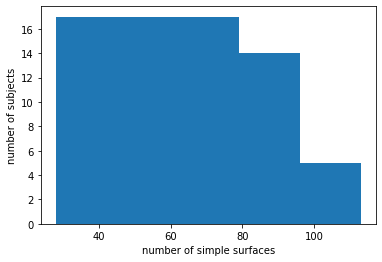

In [10]:
plt.rcParams["figure.figsize"] = [6,4]
plt.hist(dico_nb_folds, bins=5)
plt.xlabel('number of simple surfaces')
plt.ylabel('number of subjects')

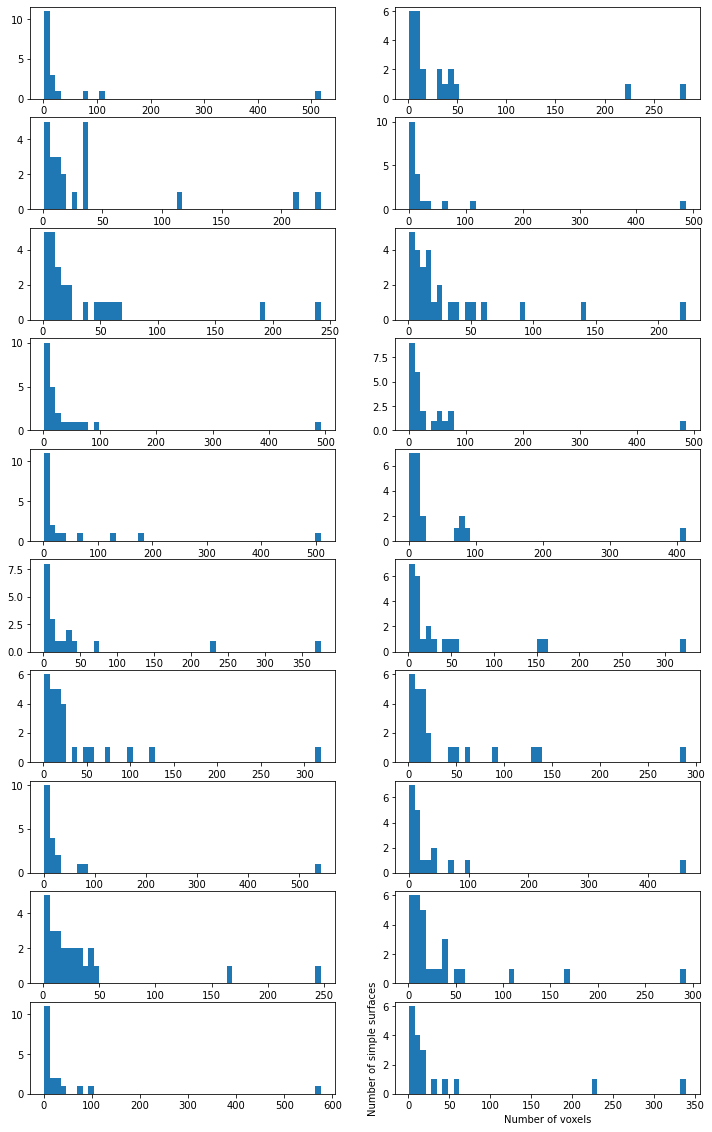

In [11]:
plt.rcParams["figure.figsize"] = [12,20]
fig, axs = plt.subplots(10,2)
i = 0

for k, sub in enumerate(list(dico_label_sub.keys())[:20]):
    nb_voxels = []
    dico_nb_voxes = {}
    for ss, vox in dico_label_sub[sub].items():
        if ss != 0:
            nb_voxels.append(vox)
            if vox in dico_nb_voxes.keys():
                dico_nb_voxes[vox] += 1
            else: 
                dico_nb_voxes[vox] = 1

    #print(f"average number of voxels per ss : {np.mean(nb_voxels)}")
    #print(f"std : {np.std(nb_voxels)}")
    #print(f"Number max of voxels: {np.max(nb_voxels)}, number min of voxels: {np.min(nb_voxels)}")
    #print(i)
    axs[int(k/2), (i+1)%2].hist(dico_nb_voxes, bins=50)
    i+=1
    plt.xlabel('Number of voxels')
    plt.ylabel('Number of simple surfaces')

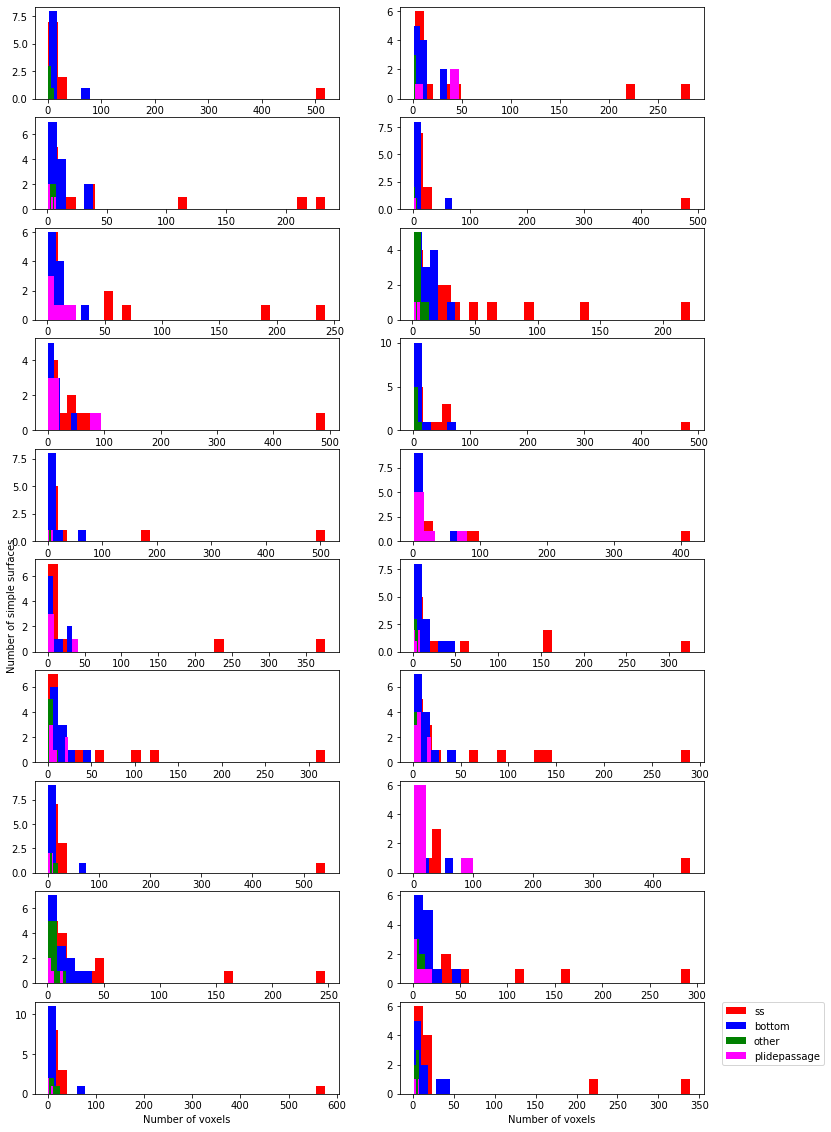

In [12]:
plt.rcParams["figure.figsize"] = [12,20]
fig, axs = plt.subplots(10,2)
i = 0

for k, sub in enumerate(list(dico_label_sub.keys())[:20]):
    nb_voxels_ss = []
    nb_voxels_bottom = []
    nb_voxels_other = []
    dico_nb_voxes_ss = {}
    dico_nb_voxes_bottom = {}
    dico_nb_voxes_other= {}
    dico_nb_voxes_junction = {}
    dico_nb_voxes_plidepassage = {}
    for ss, vox in dico_label_sub[sub].items():
        if ss != 0 and ss<1000:
            nb_voxels_ss.append(vox)
            if vox in dico_nb_voxes_ss.keys():
                dico_nb_voxes_ss[vox] += 1
            else: 
                dico_nb_voxes_ss[vox] = 1
        if ss>1000 and ss<2000:
            nb_voxels_bottom.append(vox)
            if vox in dico_nb_voxes_bottom.keys():
                dico_nb_voxes_bottom[vox] += 1
            else: 
                dico_nb_voxes_bottom[vox] = 1
        if ss>2000 and ss<3000:
            if vox in dico_nb_voxes_other.keys():
                dico_nb_voxes_other[vox] += 1
            else: 
                dico_nb_voxes_other[vox] = 1
        if ss>3000 and ss<4000:
            if vox in dico_nb_voxes_junction.keys():
                dico_nb_voxes_junction[vox] += 1
            else: 
                dico_nb_voxes_junction[vox] = 1
        if ss>4000:
            if vox in dico_nb_voxes_plidepassage.keys():
                dico_nb_voxes_plidepassage[vox] += 1
            else: 
                dico_nb_voxes_plidepassage[vox] = 1

    axs[int(k/2), (i+1)%2].hist(dico_nb_voxes_ss, bins=30, color='r', label='ss')
    axs[int(k/2), (i+1)%2].hist(dico_nb_voxes_bottom, bins=5, color='b', label='bottom')
    axs[int(k/2), (i+1)%2].hist(dico_nb_voxes_other, bins=2, color='g', label='other')
    axs[int(k/2), (i+1)%2].hist(dico_nb_voxes_plidepassage, bins=5, color='magenta', label='plidepassage')
    i+=1
    
for ax in axs.flat:
    ax.set(xlabel='Number of voxels')
axs[5,0].set(xlabel='Number of voxels', ylabel='Number of simple surfaces')
    
plt.legend(bbox_to_anchor=(1.41, 1.05))

In [13]:
list_ss = []
for sub in list(dico_label_sub.keys()):
    for keys in dico_label_sub[sub]:
        if keys <1000 and keys != 0:
            list_ss.append(dico_label_sub[sub][keys]) 
              
print(np.mean(list_ss))
print(np.std(list_ss))
print(np.max(list_ss), np.min(list_ss))

43.42403867526117
97.20791482284132
611 1


How many voxels representing folds ?

In [14]:
average = []
for sub, dico_sub in dico_label_sub.items():
    total= 0
    for key, value in dico_sub.items():
        if key != 0:
            total += value
    #print(total)
    average.append(total)
    
ave_fold = np.mean(average)
print(f"Average number of fold voxels: {ave_fold}")

Average number of fold voxels: 1070.4750227066304


In [15]:
print(f"Total number of voxels in 2mm SC crops: {39*31*45}")

Total number of voxels in 2mm SC crops: 54405


In [16]:
print(f"Proportion of fold voxels: {ave_fold / 54405*100}")

Proportion of fold voxels: 1.9676041222435996
